# L5: Industry Applications

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai
```

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

import google.generativeai as genai
from google.api_core.client_options import ClientOptions
genai.configure(
    api_key=GOOGLE_API_KEY,
    transport="rest",
    client_options=ClientOptions(
        api_endpoint=os.getenv("GOOGLE_API_BASE"),
    )
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Vision Function

In [3]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

def call_LMM(image_path: str, prompt: str, plain_text: bool=False) -> str:
    img = PIL.Image.open(image_path)

    model = genai.GenerativeModel("gemini-pro-vision")
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()
    
    if(plain_text):
        return response.text
    else:
        return to_markdown(response.text)

## Extracting Structured Data from Retreived Images
### Analyzing an invoice

In [4]:
from IPython.display import Image

Image(url="invoice.png")

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Files and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


In [5]:
call_LMM("invoice.png",
    """Identify items on the invoice, Make sure you output 
    JSON with quantity, description, unit price and ammount.""")

>  ```JSON
> {
>   "items": [
>     {
>       "quantity": 1,
>       "description": "Front and rear brake cables",
>       "unit_price": 100.00,
>       "amount": 100.00
>     },
>     {
>       "quantity": 2,
>       "description": "New set of pedal arms",
>       "unit_price": 15.00,
>       "amount": 30.00
>     },
>     {
>       "quantity": 3,
>       "description": "Labor 3hrs",
>       "unit_price": 5.00,
>       "amount": 15.00
>     }
>   ],
>   "subtotal": 145.00,
>   "sales_tax": 9.06,
>   "total": 154.06
> }
> ```

In [6]:
# Ask something else
call_LMM("invoice.png",
    """How much would four sets pedal arms cost
    and 6 hours of labour?""",
    plain_text=True
)

' A set of pedal arms costs $15, so four sets would cost $60. Six hours of labour at $5 per hour would cost $30. In total, the cost would be $60 + $30 = $90.'

### Extracting Tables from Images

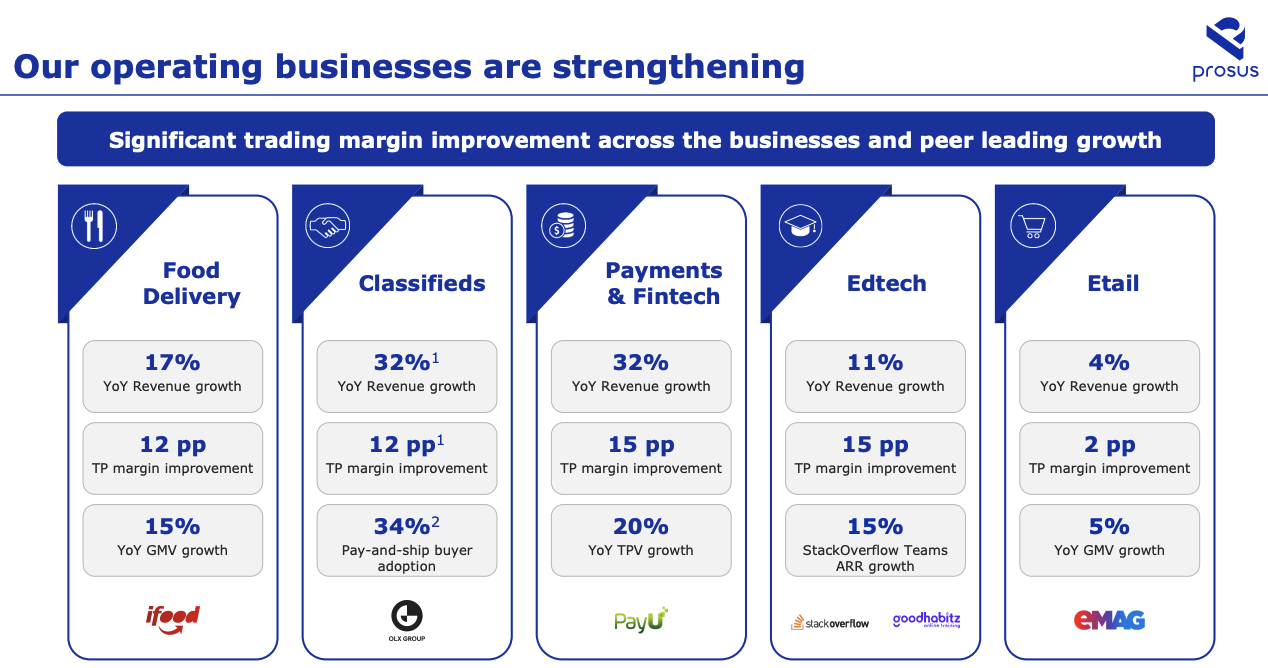

In [7]:
Image("prosus_table.png")

In [8]:
call_LMM("prosus_table.png", 
    "Print the contents of the image as a markdown table.")

>  | Business | YoY Revenue Growth | TP Margin Improvement | YoY GMV Growth |
> | - | - | - | - |
> | Food Delivery | 17% | 12 pp | 15% |
> | Classifieds | 32% | 12 pp | 34% |
> | Payments & Fintech | 32% | 15 pp | 20% |
> | Edtech | 11% | 15 pp | 15% |
> | Etail | 4% | 2 pp | 5% |

In [9]:
call_LMM("prosus_table.png", 
    """Analyse the contents of the image as a markdown table.
    Which of the business units has the highest revenue growth?""")

>  | Business Unit | YoY Revenue Growth | TP Margin Improvement | YoY GMV Growth |
> | ----------- | ----------- | ----------- | ----------- |
> | Food Delivery | 17% | 12 pp | 15% |
> | Classifieds | 32% | 12 pp | 34% |
> | Payments & Fintech | 32% | 15 pp | 20% |
> | Edtech | 11% | 15 pp | 15% |
> | Etail | 4% | 2 pp | 5% |
> 
> The business unit with the highest revenue growth is Classifieds, with 32% YoY growth.

### Analyzing Flow Charts

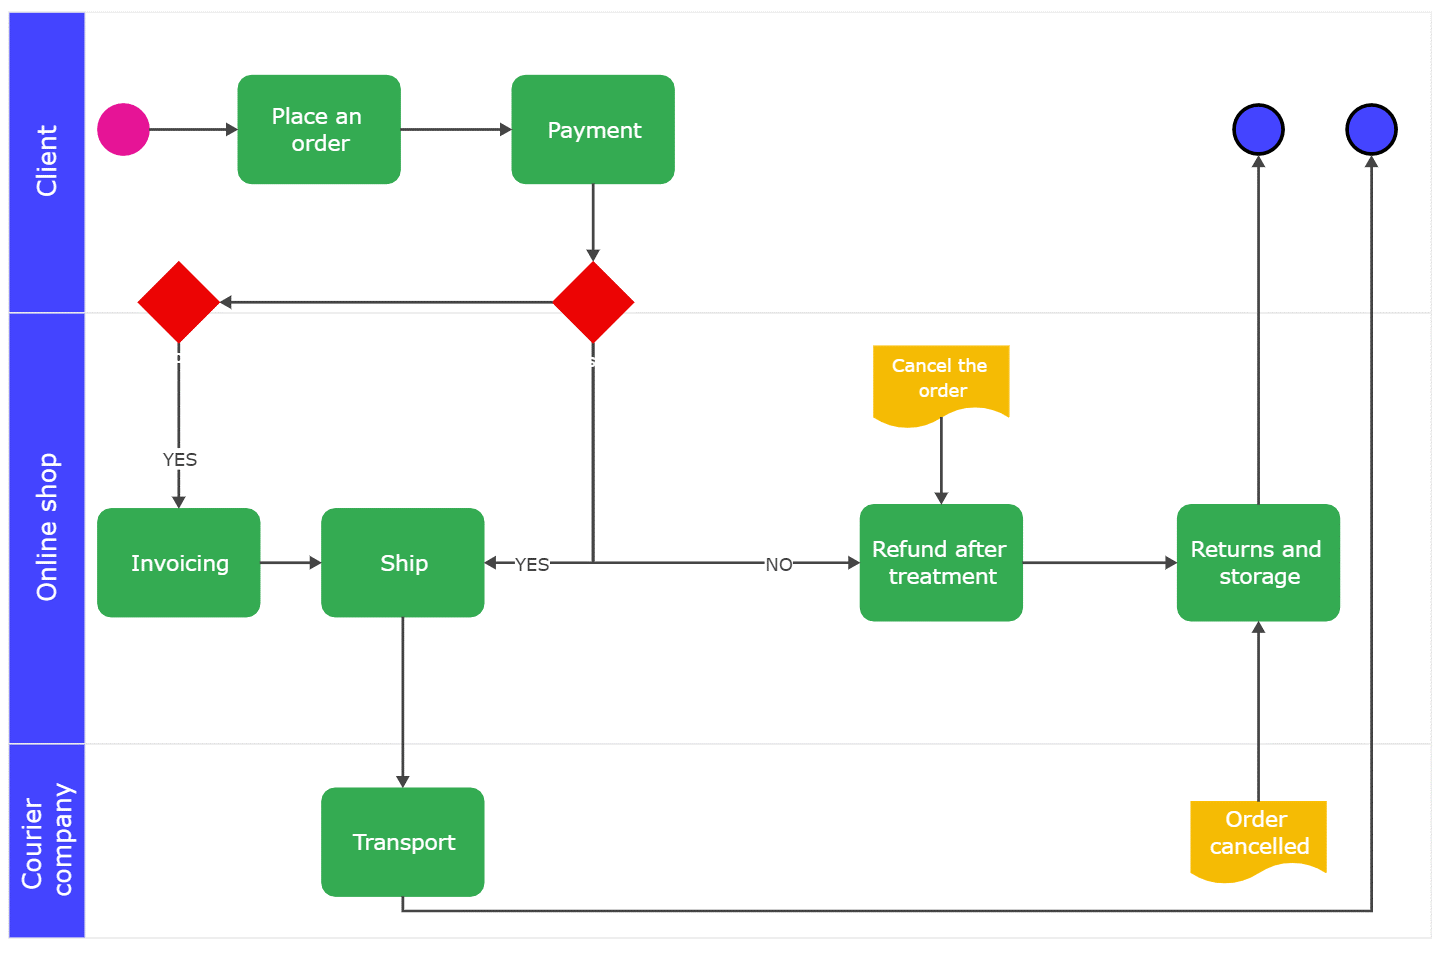

In [10]:
Image("swimlane-diagram-01.png")

In [11]:
call_LMM("swimlane-diagram-01.png", 
    """Provide a summarized breakdown of the flow chart in the image
    in a format of a numbered list.""")

>  1. The client places an order.
> 2. The online shop sends an invoice.
> 3. The client makes the payment.
> 4. The online shop ships the order.
> 5. The courier company transports the order.
> 6. The client receives the order.
> 7. If the client is not satisfied with the order, they can return it for a refund.
> 8. The online shop will process the refund after receiving the returned order.

In [12]:
call_LMM("swimlane-diagram-01.png", 
    """Analyse the flow chart in the image,
    then output Python code
    that implements this logical flow in one function""")

>  ```python
> def order_fulfillment(client, online_shop, courier_company):
>     # Client places an order
>     order_placed = client.place_order()
> 
>     # Online shop sends an invoice to the client
>     if order_placed:
>         online_shop.send_invoice(client)
> 
>     # Client makes payment
>     payment_received = client.make_payment()
> 
>     # Online shop ships the order
>     if payment_received:
>         online_shop.ship_order(courier_company)
> 
>     # Courier company transports the order
>     courier_company.transport_order()
> 
>     # Online shop sends a notification to the client that the order has been shipped
>     online_shop.send_notification(client)
> 
>     # Client receives the order
>     order_received = client.receive_order()
> 
>     # If the client cancels the order
>     if client.cancel_order():
>         # Online shop cancels the order
>         online_shop.cancel_order()
>         # Courier company cancels the order
>         courier_company.cancel_order()
>         # Online shop refunds the payment to the client
>         online_shop.refund_payment(client)
>     
>     # If the client wants to return the order
>     if client.return_order():
>         # Online shop accepts the return
>         online_shop.accept_return()
>         # Courier company returns the order to the online shop
>         courier_company.return_order()
>         # Online shop refunds the payment to the client
>         online_shop.refund_payment(client)
> ```

* Test the code generate above.
> Note: please be advised that the output may include errors or the functionality may not be fully operational, as it requires additional inputs to function properly.

In [13]:
def order_fulfillment(client, online_shop, courier_company):
   # This function takes three objects as input:
   # - client: the client who placed the order
   # - online_shop: the online shop that received the order
   # - courier_company: the courier company that will deliver the order

   # First, the client places an order.
   order = client.place_order()

   # Then, the client makes a payment for the order.
   payment = client.make_payment(order)

   # If the payment is successful, the order is shipped.
   if payment.status == "successful":
       online_shop.ship_order(order)
       courier_company.transport_order(order)
   
   # If the payment is not successful, the order is canceled.
   else:
       online_shop.cancel_order(order)
       client.refund_order(order)

   # Finally, the order is invoiced.
   online_shop.invoice_order(order)